In [2]:
# ============================
# Import Dataset
# ============================
import pandas as pd
file_path = "sample_africa. csv"
df = pd.read_csv(file_path)
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.sort_values('Datetime').reset_index(drop=True)
print(df)

            Date    Lat    Lon  Depth  Mag  Strike  Dip  Rake        Time  \
0     1976/05/11  37.56  20.35   33.0  6.4     339   14   110  16:59:48.2   
1     1976/11/24  39.12  44.03   36.0  7.3     203   77     9  12:22:18.8   
2     1977/01/06  -2.51  28.70   21.0  5.3     241   45   -90  18:33:43.5   
3     1977/01/07 -31.28 -13.24   33.0  5.5      18   46   -59  14:38:22.4   
4     1977/02/24 -11.69 -13.62   33.0  5.5      74   71    11  08:51:16.6   
...          ...    ...    ...    ...  ...     ...  ...   ...         ...   
2383  2020/12/13 -17.75 -12.75   10.0  4.9     210   40   -32  06:42:00.0   
2384  2020/12/17  35.66  26.26   10.0  4.8     164   45  -116  13:36:45.4   
2385  2020/12/23  38.41  22.07   10.0  4.8     295   44   -59  14:58:24.7   
2386  2020/12/27  38.46  39.23    9.0  5.5     231   36   -22  06:37:32.9   
2387  2020/12/30  -1.25 -13.66   10.0  4.7     341   89     1  21:58:16.1   

                    Datetime  
0    1976-05-11 16:59:48.200  
1    1976-11-

In [3]:
# ===============================================
# Gardner and Knopoff Window Method (1974)
# ===============================================

In [4]:
# --- Step 1: Run the declustering algorithm ---
from gk_decluster import window_decluster, get_valid_clusters, get_mainshocks
clustered_catalog = window_decluster(df)
print(clustered_catalog)  # This catalogue contains mainshocks, dependent shocks and noise

            Date    Lat    Lon  Depth  Mag  Strike  Dip  Rake        Time  \
0     1976/05/11  37.56  20.35   33.0  6.4     339   14   110  16:59:48.2   
1     1976/11/24  39.12  44.03   36.0  7.3     203   77     9  12:22:18.8   
2     1977/01/06  -2.51  28.70   21.0  5.3     241   45   -90  18:33:43.5   
3     1977/01/07 -31.28 -13.24   33.0  5.5      18   46   -59  14:38:22.4   
4     1977/02/24 -11.69 -13.62   33.0  5.5      74   71    11  08:51:16.6   
...          ...    ...    ...    ...  ...     ...  ...   ...         ...   
2383  2020/12/13 -17.75 -12.75   10.0  4.9     210   40   -32  06:42:00.0   
2384  2020/12/17  35.66  26.26   10.0  4.8     164   45  -116  13:36:45.4   
2385  2020/12/23  38.41  22.07   10.0  4.8     295   44   -59  14:58:24.7   
2386  2020/12/27  38.46  39.23    9.0  5.5     231   36   -22  06:37:32.9   
2387  2020/12/30  -1.25 -13.66   10.0  4.7     341   89     1  21:58:16.1   

                    Datetime             x             y  is_dependent  \
0

In [5]:
# --- Step 2: Identify valid clusters (size >= 2) ---
valid_cluster_ids = get_valid_clusters(clustered_catalog)
print(f"--- Identified Valid Cluster IDs (size >= 2) ---\n{valid_cluster_ids.to_list()}\n")

# Filter the catalog to only include events from these valid clusters
sequences_df = clustered_catalog[clustered_catalog['ClusterID'].isin(valid_cluster_ids)]
print("--- DataFrame with Only Valid Sequences ---")
print(sequences_df[['Datetime', 'Mag', 'ClusterID']])

--- Identified Valid Cluster IDs (size >= 2) ---
[1, 10, 17, 23, 24, 32, 33, 43, 44, 57, 59, 60, 61, 63, 66, 68, 72, 83, 92, 94, 110, 120, 125, 140, 150, 153, 160, 175, 180, 185, 202, 206, 210, 225, 228, 234, 237, 239, 241, 244, 261, 277, 287, 288, 292, 295, 297, 302, 303, 311, 314, 325, 330, 333, 340, 341, 344, 352, 358, 359, 367, 368, 369, 373, 380, 381, 383, 384, 387, 390, 398, 402, 409, 415, 435, 437, 440, 444, 448, 463, 467, 474, 482, 483, 484, 495, 497, 502, 506, 527, 532, 536, 537, 540, 547, 548, 552, 553, 559, 569, 573, 582, 585, 589, 590, 593, 597, 602, 603, 619, 620, 623, 624, 628, 633, 638, 642, 644, 647, 658, 666, 671, 672, 675, 677, 678, 687, 689, 693, 694, 697, 708, 710, 711, 721, 722, 723, 724, 728, 731, 732, 733, 735, 748, 755, 760, 762, 765, 774, 782, 786, 787, 797, 798, 802, 803, 806, 810, 811, 819, 824, 825, 827, 828, 832, 833, 839, 841, 842, 845, 846, 851, 871, 884, 888, 889, 891, 893, 896, 897, 900, 902, 908, 912, 913, 915, 920, 921, 931, 938, 941, 947, 948, 950, 9

In [6]:
# --- Step 3: Identify the mainshock in each sequence ---
final_catalog = get_mainshocks(sequences_df)
print("--- Final Catalog with Mainshocks Identified ---")
print(final_catalog[['Datetime', 'Mag', 'ClusterID', 'Type']])

--- Final Catalog with Mainshocks Identified ---
                    Datetime  Mag  ClusterID       Type
1    1976-11-24 12:22:18.800  7.3          1  Mainshock
9    1977-05-26 01:35:13.800  5.4          1  Dependent
11   1977-06-05 04:45:07.600  5.8         10  Mainshock
12   1977-06-05 08:25:30.800  5.1         10  Dependent
19   1977-08-18 09:27:40.000  5.3         17  Dependent
...                      ...  ...        ...        ...
2376 2020-11-27 21:00:55.500  5.1       1549  Mainshock
2381 2020-12-04 02:53:59.600  4.5       1540  Dependent
2383 2020-12-13 06:42:00.000  4.9       1559  Dependent
2384 2020-12-17 13:36:45.400  4.8       1569  Dependent
2386 2020-12-27 06:37:32.900  5.5       1502  Dependent

[1143 rows x 4 columns]


In [7]:
# --- Step 4: Display only the mainshocks ---
mainshocks_only = final_catalog[final_catalog['Type'] == 'Mainshock'].copy()
print("--- Mainshocks of Valid Sequences ---")
print(mainshocks_only[['Datetime', 'Mag', 'ClusterID']])

--- Mainshocks of Valid Sequences ---
                    Datetime  Mag  ClusterID
1    1976-11-24 12:22:18.800  7.3          1
11   1977-06-05 04:45:07.600  5.8         10
21   1977-09-11 23:19:23.700  6.0         17
27   1977-12-28 02:45:36.700  6.6         24
30   1978-02-11 12:54:21.600  5.3         23
...                      ...  ...        ...
2350 2020-08-22 08:38:01.700  6.0       1561
2354 2020-08-31 21:18:02.700  5.9       1564
2365 2020-10-12 04:11:27.600  5.2       1569
2369 2020-10-30 11:51:27.400  7.0       1572
2376 2020-11-27 21:00:55.500  5.1       1549

[339 rows x 3 columns]


In [8]:
# ========================================
# Estimation and further data exploration
# ========================================

In [9]:
# Visualise the clustered sequence on map
import plotly.express as px

sequences_df['Cluster'] = sequences_df['ClusterID'].astype('category')

fig = px.scatter_map(
    sequences_df,
    lat='Lat',
    lon='Lon',
    hover_name='ClusterID',
    color='Cluster',
    color_discrete_sequence=px.colors.qualitative.Alphabet,
    hover_data={'Date', 'Time', 'Lat', 'Lon'},
    zoom=2,
    height=800,
    map_style='carto-positron',
    title='Earthquake Clustering using Gardner and Knopoff Window Method (1974)<br><sup>Time of occurrence: 1976-2020 | Africa and its surrounding area</sup>'
)

fig.show()

/var/folders/fn/9d0nx8h147x36gzgyptphd8w0000gn/T/ipykernel_37421/532482459.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sequences_df['Cluster'] = sequences_df['ClusterID'].astype('category')


In [10]:
# Compute inter-arrival timesCompute inter-arrival times to second
mainshocks_only['inter_arrival'] = mainshocks_only['Datetime'].diff().dt.total_seconds()
print(mainshocks_only.head())

          Date    Lat    Lon  Depth  Mag  Strike  Dip  Rake        Time  \
1   1976/11/24  39.12  44.03   36.0  7.3     203   77     9  12:22:18.8   
11  1977/06/05  32.64  48.09   40.0  5.8     293   34    91  04:45:07.6   
21  1977/09/11  35.05  23.03   33.0  6.0      74   28   100  23:19:23.7   
27  1977/12/28  16.66  40.28   33.0  6.6     106   66  -171  02:45:36.7   
30  1978/02/11  13.16  50.95   33.0  5.3     116   39   -79  12:54:21.6   

                  Datetime             x             y  is_dependent  \
1  1976-11-24 12:22:18.800  3.028025e+06  4.754392e+06         False   
11 1977-06-05 04:45:07.600  3.672092e+06  4.141797e+06         False   
21 1977-09-11 23:19:23.700  1.233124e+06  3.908206e+06          True   
27 1977-12-28 02:45:36.700  3.271806e+06  2.025971e+06         False   
30 1978-02-11 12:54:21.600  4.646672e+06  1.783873e+06          True   

    ClusterID       Type  inter_arrival  
1           1  Mainshock            NaN  
11         10  Mainshock     166

In [11]:
# The Statistic Features of the Mainshock Sequence
print("--- The Statistic Features of the Mainshock Sequence ---")
print("The declustered catalogue contains {} events.".format(len(mainshocks_only)))

max_interval_days = round(mainshocks_only['inter_arrival'].max() / (24*60*60))
print("The maximum interarrival time between two neighbour independent events is {} days.".format(max_interval_days))

min_interval_min = round(mainshocks_only['inter_arrival'].min() / 60)
print("The minimum interarrival time between two neighbour independent events is {} minutes.".format(min_interval_min))

--- The Statistic Features of the Mainshock Sequence ---
The declustered catalogue contains 339 events.
The maximum interarrival time between two neighbour independent events is 494 days.
The minimum interarrival time between two neighbour independent events is 76 minutes.


In [12]:
# Visualise the declustered mainshock sequence on map
import plotly.express as px

fig_mainshock = px.scatter_map(
    mainshocks_only,
    lat='Lat',
    lon='Lon',
    hover_name='Mag',
    size='Mag',
    size_max=8,
    color='Mag',
    color_continuous_scale='orrd',
    hover_data={'Date', 'Time', 'Lat', 'Lon'},
    zoom=2,
    height=800,
    map_style='carto-positron',
    title='Declustered Mainshock Sequence using Gardner and Knopoff Window Method (1974)<br><sup>Time of occurrence: 1976-2020 | Africa and its Surrounding Area</sup>'
)

fig_mainshock.show()

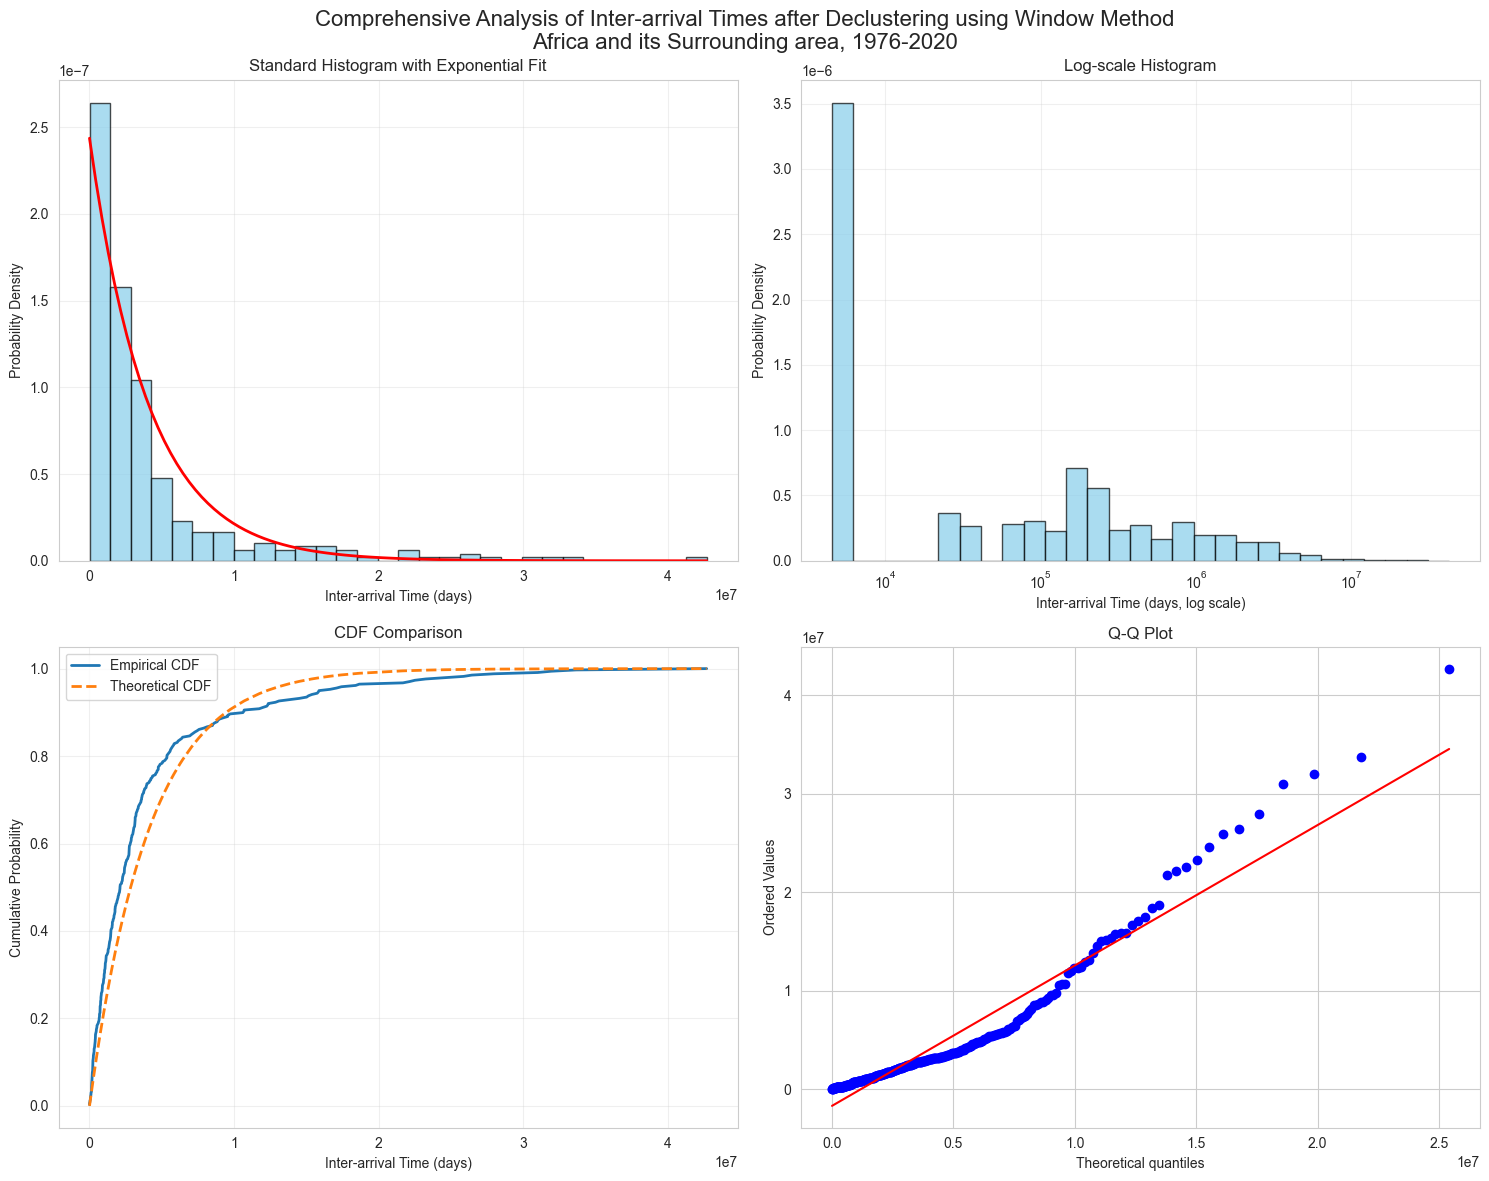

In [18]:
# Visualisation: The inter_arrival times are expected to fit an exponential distribution
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import expon
from scipy.stats import probplot

x = mainshocks_only['inter_arrival'].dropna()
loc, scale = expon.fit(x)

# Comprehensive analysis for the raw catalogue
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Standard Histogram with Exponential Fit (Top-Left)
axes[0, 0].hist(x, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
x_range = np.linspace(x.min(), x.max(), 100)
axes[0, 0].plot(x_range, expon.pdf(x_range, loc, scale), 'r-', lw=2)
axes[0, 0].set_title('Standard Histogram with Exponential Fit')
axes[0, 0].set_xlabel('Inter-arrival Time (days)')
axes[0, 0].set_ylabel('Probability Density')
axes[0, 0].grid(True, alpha=0.3)

# Log-scale Histogram (Top-Right)
bins = np.logspace(np.log10(x.min()), np.log10(x.max()), 30)
axes[0, 1].hist(x, bins=bins, density=True, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 1].set_xscale('log')
axes[0, 1].set_title('Log-scale Histogram')
axes[0, 1].set_xlabel('Inter-arrival Time (days, log scale)')
axes[0, 1].set_ylabel('Probability Density')
axes[0, 1].grid(True, alpha=0.3)

# CDF Comparison (Bottom-Left)
x_sorted = np.sort(x)
y_ecdf = np.arange(1, len(x_sorted)+1) / len(x_sorted)
y_theoretical = expon.cdf(x_sorted, loc, scale)
axes[1, 0].plot(x_sorted, y_ecdf, label='Empirical CDF', linewidth=2)
axes[1, 0].plot(x_sorted, y_theoretical, label='Theoretical CDF', linestyle='--', linewidth=2)
axes[1, 0].set_title('CDF Comparison')
axes[1, 0].set_xlabel('Inter-arrival Time (days)')
axes[1, 0].set_ylabel('Cumulative Probability')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Q-Q Plot (Bottom-Right)
probplot(x, dist=expon, sparams=(loc, scale), plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot')


plt.suptitle('Comprehensive Analysis of Inter-arrival Times after Declustering using Window Method\nAfrica and its Surrounding area, 1976-2020', fontsize=16)
plt.tight_layout()

plt.savefig('comprehensive_analysis_africa_window.png', dpi=300, bbox_inches='tight')
plt.show()

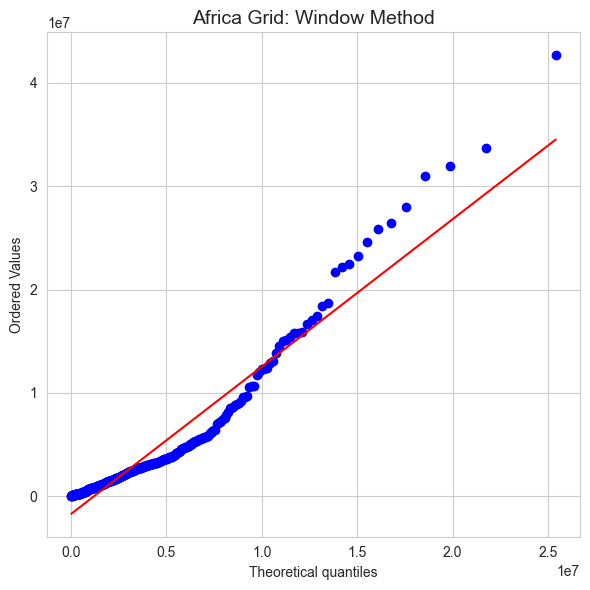

In [14]:
# Q-Q Plot (Zoom out)
x = mainshocks_only['inter_arrival'].dropna()
loc, scale = expon.fit(x)

plt.figure(figsize=(6, 6))
probplot(x, dist=expon, sparams=(loc, scale), plot=plt)
plt.title("Africa Grid: Window Method", fontsize=14)
plt.tight_layout()
plt.savefig("qq_africa_window.png", dpi=300)
plt.show()

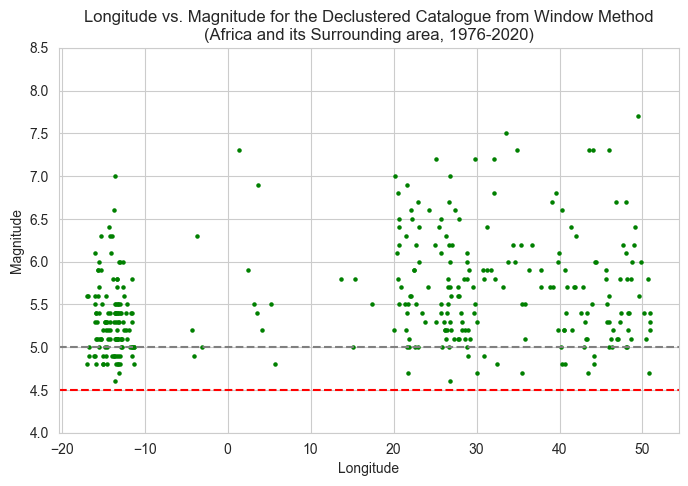

In [19]:
# Lon vs Mag
import matplotlib.pyplot as plt

x = mainshocks_only['Lon']
y = mainshocks_only['Mag']

plt.figure(figsize=(8, 5))
plt.ylim(4, 8.5)
plt.scatter(x, y, s=5, color='green')
plt.axhline(y=4.5, color='red', linestyle='--')  # Observing the minor magnitude(<4.5) events for comparison
plt.axhline(y=5, color='grey', linestyle='--')  # Observing the minor magnitude events(<5) for comparison
plt.xlabel("Longitude")
plt.ylabel("Magnitude")
plt.title("Longitude vs. Magnitude for the Declustered Catalogue from Window Method\n(Africa and its Surrounding area, 1976-2020)")
plt.show()

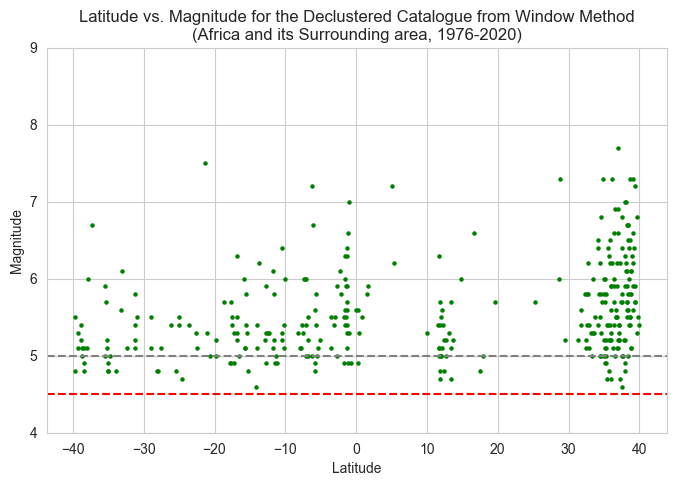

In [16]:
# Lat vs Mag
import matplotlib.pyplot as plt

x = mainshocks_only['Lat']
y = mainshocks_only['Mag']

plt.figure(figsize=(8, 5))
plt.ylim(4, 9)
plt.scatter(x, y, s=5, color='green')
plt.axhline(y=4.5, color='red', linestyle='--')  # Observing the minor magnitude(<4.5) events for comparison
plt.axhline(y=5, color='grey', linestyle='--')  # Observing the minor magnitude events(<5) for comparison
plt.xlabel("Latitude")
plt.ylabel("Magnitude")
plt.title("Latitude vs. Magnitude for the Declustered Catalogue from Window Method\n(Africa and its Surrounding area, 1976-2020)")
plt.show()

In [17]:
# KS test
from scipy.stats import kstest, expon

x = mainshocks_only['inter_arrival'].dropna()
loc, scale = expon.fit(x)
stat, p_value = kstest(x, 'expon', args=(loc, scale))

# If p_value > 0.05, the inter-arrival times are consistent with an exponential distribution.
# This implies that the earthquake occurrences follow a Poisson process.
print(f"K-S test p-value: {p_value:.4f}")
print(f"K-S Test Statistic (D): {stat:.4f}")

METHOD_NAME = "Window Method"
if p_value > 0.05:
    # We fail to reject the null hypothesis.
    print(f"The declustered mainshock sequence from the {METHOD_NAME} method is consistent with a Poisson process.")
else:
    # We reject the null hypothesis.
    print(f"The declustered mainshock sequence from the {METHOD_NAME} method is not consistent with a Poisson process.")

K-S test p-value: 0.0000
K-S Test Statistic (D): 0.1247
The declustered mainshock sequence from the Window Method method is not consistent with a Poisson process.
